# Espace Note

In [ ]:
# regarder si des couleurs sont atypiques attirent des comportements atypiques chez certains clients

# établir une répartition des types d'articles achetés dans la période de l'année où l'on doit faire
# la prédiction. Il faut faire de même pour les couleurs de saison et vérifier si elles sont différentes
# d'une année sur l'autre pour évaluer la mode. Il faut aussi voir la couleur à la mode pour l'année

# établir le profil des clients en fonction des types d'objets achetés. Puis par série ou non ?

# établir une liste des articles qui s'achètent en simple, double, triple

In [ ]:
# Hypothèse 1 On va retirer les clients qui commandent plus que 99% de clients

# Espace travail

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time 
import sys
import csv
import pickle
import os
from sklearn.model_selection import train_test_split
import random
import datetime
import nltk
from sklearn.metrics import f1_score
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [2]:
meta_art = pd.read_csv('articles.csv',dtype={'article_id': str})
meta_cust = pd.read_csv('customers.csv')
sub_format = pd.read_csv('sample_submission.csv')
df = pd.read_csv('transactions_train.csv',dtype={'article_id': str})

In [117]:
print(meta_cust.columns)

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')


In [135]:
meta_cust['FN'].unique()

array([nan,  1.])

In [136]:
meta_cust['Active'].unique()

array([nan,  1.])

In [137]:
meta_cust['club_member_status'].unique() 

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [138]:
meta_cust['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [139]:
print(np.min(meta_cust['age']),np.max(meta_cust['age']))

16.0 99.0


In [147]:
meta_cust.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [150]:
meta_cust['FN'] = meta_cust['FN'].fillna(0)
meta_cust['Active'] = meta_cust['Active'].fillna(0)
print(f1_score(meta_cust['FN'],meta_cust['Active']))

0.9866933522001755


<AxesSubplot:xlabel='age', ylabel='Count'>

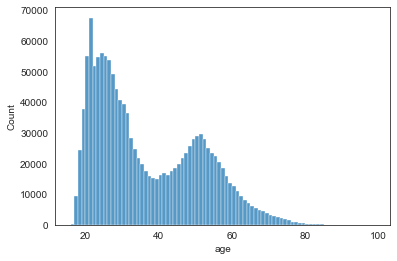

In [140]:
sns.set_style("white")
sns.histplot(meta_cust['age'],bins=99-16)

In [152]:
meta_cust['postal_code']

0          52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1          2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2          64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3          5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4          25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
                                 ...                        
1371975    7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976    3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977    4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978    8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...
1371979    0a1a03306fb2f62164c2a439b38c0caa64b40deaae8687...
Name: postal_code, Length: 1371980, dtype: object

In [153]:
len(meta_cust)

1371980

In [154]:
meta_cust['postal_code'].nunique()

352899

In [48]:
print(meta_art.shape,meta_art.columns)

(105542, 25) Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')


In [11]:
print(meta_cust.shape,meta_cust.columns)

(1371980, 7) Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')


In [16]:
sub_format

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...
...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0706016001 0706016002 0372860001 0610776002 07...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0706016001 0706016002 0372860001 0610776002 07...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0706016001 0706016002 0372860001 0610776002 07...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0706016001 0706016002 0372860001 0610776002 07...


In [17]:
print(df.shape)
print(df.columns)

(31788324, 5)
Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')


In [221]:
df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2


In [156]:
df['sales_channel_id'].unique()

array([2, 1], dtype=int64)

In [3]:
rep_art = df['article_id'].unique()

<AxesSubplot:xlabel='Article_id', ylabel="Nombre d'achats">

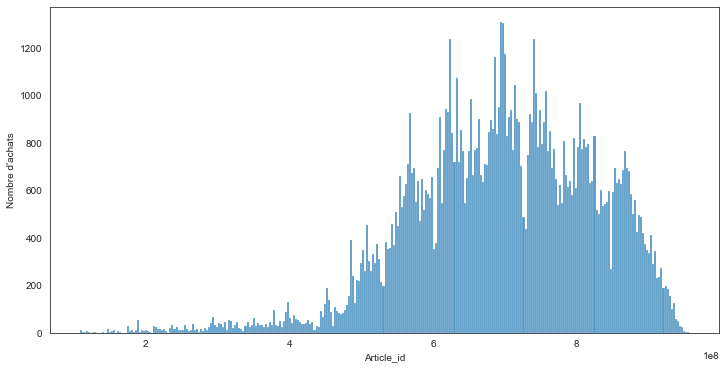

In [77]:
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(12,6), sharex=True)
ax.set_xlabel('Article_id')
ax.set_ylabel('Nombre d\'achats')
sns.histplot(rep_art,bins=300)

In [47]:
np.max(rep_art)

956217002

In [51]:
meta_art[meta_art['article_id']==np.max(rep_art)]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."


In [155]:
print(meta_art.columns)

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')


In [150]:
meta_art.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [86]:
meta_art['colour_group_name'].unique()

array(['Black', 'White', 'Off White', 'Light Beige', 'Beige', 'Grey',
       'Light Blue', 'Light Grey', 'Dark Blue', 'Dark Grey', 'Pink',
       'Dark Red', 'Greyish Beige', 'Light Orange', 'Silver', 'Gold',
       'Light Pink', 'Dark Pink', 'Yellowish Brown', 'Blue',
       'Light Turquoise', 'Yellow', 'Greenish Khaki', 'Dark Yellow',
       'Other Pink', 'Dark Purple', 'Red', 'Transparent', 'Dark Green',
       'Other Red', 'Turquoise', 'Dark Orange', 'Other', 'Orange',
       'Dark Beige', 'Other Yellow', 'Light Green', 'Other Orange',
       'Purple', 'Light Red', 'Light Yellow', 'Green', 'Light Purple',
       'Dark Turquoise', 'Other Purple', 'Bronze/Copper',
       'Other Turquoise', 'Other Green', 'Other Blue', 'Unknown'],
      dtype=object)

In [173]:
meta_art['graphical_appearance_name'].unique()

array(['Solid', 'Stripe', 'All over pattern', 'Melange', 'Transparent',
       'Metallic', 'Application/3D', 'Denim', 'Colour blocking', 'Dot',
       'Other structure', 'Contrast', 'Treatment', 'Check', 'Chambray',
       'Front print', 'Glittering/Metallic', 'Mixed solid/pattern',
       'Placement print', 'Other pattern', 'Neps', 'Embroidery', 'Lace',
       'Jacquard', 'Unknown', 'Argyle', 'Slub', 'Mesh', 'Sequin',
       'Hologram'], dtype=object)

In [174]:
meta_art['perceived_colour_value_name'].unique()

array(['Dark', 'Light', 'Dusty Light', 'Medium Dusty', 'Bright', 'Medium',
       'Undefined', 'Unknown'], dtype=object)

In [175]:
meta_art['perceived_colour_master_name'].unique()

array(['Black', 'White', 'Beige', 'Grey', 'Blue', 'Pink', 'Lilac Purple',
       'Red', 'Mole', 'Orange', 'Metal', 'Brown', 'Turquoise', 'Yellow',
       'Khaki green', 'Green', 'undefined', 'Unknown', 'Yellowish Green',
       'Bluish Green'], dtype=object)

In [179]:
meta_art['product_group_name'].unique()

array(['Garment Upper body', 'Underwear', 'Socks & Tights',
       'Garment Lower body', 'Accessories', 'Items', 'Nightwear',
       'Unknown', 'Underwear/nightwear', 'Shoes', 'Swimwear',
       'Garment Full body', 'Cosmetic', 'Interior textile', 'Bags',
       'Furniture', 'Garment and Shoe care', 'Fun', 'Stationery'],
      dtype=object)

In [110]:
meta_art['product_type_name'].unique()

array(['Vest top', 'Bra', 'Underwear Tights', 'Socks', 'Leggings/Tights',
       'Sweater', 'Top', 'Trousers', 'Hair clip', 'Umbrella',
       'Pyjama jumpsuit/playsuit', 'Bodysuit', 'Hair string', 'Unknown',
       'Hoodie', 'Sleep Bag', 'Hair/alice band', 'Belt', 'Boots',
       'Bikini top', 'Swimwear bottom', 'Underwear bottom', 'Swimsuit',
       'Skirt', 'T-shirt', 'Dress', 'Hat/beanie', 'Kids Underwear top',
       'Shorts', 'Shirt', 'Cap/peaked', 'Pyjama set', 'Sneakers',
       'Sunglasses', 'Cardigan', 'Gloves', 'Earring', 'Bag', 'Blazer',
       'Other shoe', 'Jumpsuit/Playsuit', 'Sandals', 'Jacket', 'Costumes',
       'Robe', 'Scarf', 'Coat', 'Other accessories', 'Polo shirt',
       'Slippers', 'Night gown', 'Alice band', 'Straw hat', 'Hat/brim',
       'Tailored Waistcoat', 'Necklace', 'Ballerinas', 'Tie',
       'Pyjama bottom', 'Felt hat', 'Bracelet', 'Blouse',
       'Outdoor overall', 'Watch', 'Underwear body', 'Beanie', 'Giftbox',
       'Sleeping sack', 'Dungarees',

In [176]:
meta_art['department_name'].unique()

array(['Jersey Basic', 'Clean Lingerie', 'Tights basic', 'Baby basics',
       'Casual Lingerie', 'Jersey', 'EQ & Special Collections',
       'Hair Accessories', 'Other items', 'Baby Nightwear',
       'Men Sport Woven', 'Men Sport Bottoms', 'Kids Boy Denim',
       'Shopbasket Socks', 'Socks', 'UW', 'Young Girl Jersey Basic',
       'Jacket Street', 'Belts', 'Divided Shoes', 'Swimwear',
       'Underwear Jersey', 'Basic 1', 'Tops Knitwear DS', 'Men Sport Acc',
       'Kids Boy Jersey Basic', 'Young Girl UW/NW', 'Shirt', 'Nightwear',
       'Trouser', 'Small Accessories', 'Sunglasses', 'Gloves/Hats',
       'Knit & Woven', 'Basics', 'Accessories', 'Jewellery',
       'Jersey Fancy DS', 'Trousers DS', 'Bags', 'Blazer S&T', 'Knitwear',
       'Woven bottoms', 'Shorts', 'Dresses DS', 'Expressive Lingerie',
       'Kids Girl UW/NW', 'Young Boy Jersey Basic', 'Kids Girl S&T',
       'Young Girl S&T', 'Shoes / Boots inactive from s5', 'Nursing',
       'Jersey Fancy', 'Shoes', 'Functional L

In [177]:
meta_art['section_name'].unique()

array(['Womens Everyday Basics', 'Womens Lingerie',
       'Womens Nightwear, Socks & Tigh', 'Baby Essentials & Complements',
       'Men Underwear', 'Mama', 'Womens Small accessories',
       'Men H&M Sport', 'Kids Boy', 'Divided Basics',
       'Girls Underwear & Basics', 'Mens Outerwear',
       'Womens Big accessories', 'Divided Accessories',
       'Womens Swimwear, beachwear', 'Divided Selected',
       'Boys Underwear & Basics', 'Contemporary Street',
       'Contemporary Casual', 'Men Accessories', 'Men Suits & Tailoring',
       'Womens Everyday Collection', 'Men Shoes', 'Young Boy', 'H&M+',
       'Divided Collection', 'Ladies Denim', 'Contemporary Smart',
       'Womens Trend', 'Kids Outerwear', 'Young Girl', 'Womens Shoes',
       'Womens Tailoring', 'Divided Projects', 'Denim Men', 'Men Other',
       'Womens Jackets', 'Men Other 2', 'Baby Boy', 'Womens Casual',
       'Kids Accessories, Swimwear & D', 'Ladies H&M Sport',
       'Kids & Baby Shoes', 'Baby Girl', 'Kids Girl

In [178]:
meta_art['garment_group_name'].unique()

array(['Jersey Basic', 'Under-, Nightwear', 'Socks and Tights',
       'Jersey Fancy', 'Accessories', 'Trousers Denim', 'Outdoor',
       'Shoes', 'Swimwear', 'Knitwear', 'Shirts', 'Trousers', 'Dressed',
       'Shorts', 'Dresses Ladies', 'Skirts', 'Special Offers', 'Blouses',
       'Unknown', 'Woven/Jersey/Knitted mix Baby', 'Dresses/Skirts girls'],
      dtype=object)

In [180]:
meta_art['index_group_name'].unique()

array(['Ladieswear', 'Baby/Children', 'Menswear', 'Sport', 'Divided'],
      dtype=object)

<AxesSubplot:xlabel='t_conv', ylabel='Count'>

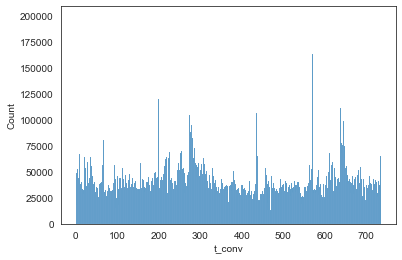

In [135]:
sns.histplot(df['t_conv'],bins=733)

In [9]:
test = df.groupby('customer_id')['t_dat'].nunique()

<AxesSubplot:xlabel='t_dat', ylabel='Count'>

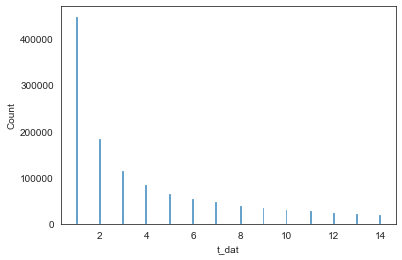

In [254]:
sns.histplot(test[test<15])

In [10]:
seuil = 0.0
nb_achat=0
while seuil<0.99:
    nb_achat+=1
    seuil=len(test[test<(nb_achat+1)])/len(test)
print(nb_achat)

45


In [11]:
cust_too_many_commands =test[test>45].index
print(len(cust_too_many_commands))

13340


In [12]:
# Remove customers that ordered more than 99% of the customers. We consider for that, that the number
# of different days a customer has made an order and each day is only 1 order which is not sure
df1 = df1[~df1['customer_id'].isin(cust_too_many_commands)]

In [13]:
df1.shape

(28932805, 6)

# Definition of the first time client

In [158]:
most_bought_2020 = df1[df1['t_dat'] > '2020-08-22'].groupby('article_id')['customer_id'].nunique()\
.sort_values(ascending=False).head(12)

most_bought_2019 = df1[(df1['t_dat'] > '2019-08-22')&(df1['t_dat'] <= '2019-09-22')].groupby('article_id')['customer_id'].nunique()\
.sort_values(ascending=False).head(12)

most_bought_2018 = df1[(df1['t_dat'] > '2018-09-22')&(df1['t_dat'] <= '2018-10-15')].groupby('article_id')['customer_id'].nunique()\
.sort_values(ascending=False).head(12)

In [161]:
set(most_bought_2020.index).intersection(set(most_bought2019.index))

{'0706016001', '0751471001'}

In [162]:
set(most_bought_2019.index).intersection(set(most_bought2018.index))

set()

# Pattern related to the time of the year

In [15]:
df_info = df1.merge(meta_art,how='left',on='article_id')
df_info.head()

,t_dat,customer_id,article_id,price,sales_channel_id,t_conv,product_code,prod_name,product_type_no,product_type_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2,1.0,663713,Atlanta Push Body Harlow,283,Underwear body,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2,1.0,541518,Rae Push (Melbourne) 2p,306,Bra,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa..."
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2,1.0,505221,Inca Jumper,252,Sweater,...,Tops Knitwear DS,D,Divided,2,Divided,58,Divided Selected,1003,Knitwear,Jumper in rib-knit cotton with hard-worn detai...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2,1.0,685687,W YODA KNIT OL OFFER,252,Sweater,...,Campaigns,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2,1.0,685687,W YODA KNIT OL OFFER,252,Sweater,...,Campaigns,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...


In [16]:
df_info_2019 = df_info[(df_info['t_dat']>'2019-09-08')&(df_info['t_dat']<='2019-09-22')]
df_info_2019_bis = df_info[(df_info['t_dat']>'2019-09-22')&(df_info['t_dat']<='2019-10-05')]
print(df_info_2019.shape,df_info_2019_bis.shape)
# We can see here that there is an impulse in purchases which could mean that season has an impact or
# sales maybe. This could mean different type of clothing(season), pricier clothing(sales)
#or even unusual clothing get better prices

(432360, 30) (628574, 30)


In [218]:
df_info_2018 = df_info[(df_info['t_dat']>='2018-09-20')&(df_info['t_dat']<='2018-10-03')]
df_info_2018_bis = df_info[(df_info['t_dat']>'2018-10-04')&(df_info['t_dat']<='2018-10-18')]
# df_info_2019 = df_info[(df_info['t_dat']>'2019-09-08')&(df_info['t_dat']<='2019-09-22')]
# df_info_2019_bis = df_info[(df_info['t_dat']>'2019-09-22')&(df_info['t_dat']<='2019-10-05')]
df_info_2020 = df_info[(df_info['t_dat']>'2020-09-08')&(df_info['t_dat']<='2020-09-22')]

In [140]:
print(df_info_2018.shape,df_info_2019_bis.shape,df_info_2018_bis.shape,df_info_2019.shape,\
      df_info_2020.shape)
# we can see here that 2020 is equivalent to 2019 at the same periode and 2018 is equivalent to 2019
# at the same periode

(656483, 30) (628574, 30) (569171, 30) (432360, 30) (449161, 30)


In [112]:
# creates hist plot of trends in a category around September from 2018, 2019 and 2020
# based on the available weeks

def plot_trends_year(subject,title):
    sns.set_style("white")
    fig, axes = plt.subplots(3, 4, figsize=(40, 20))
    axes = axes.flatten()
    nb = set(df_info[subject])    
    plt.subplot(3,4,3)
    df=pd.Categorical(df_info[(df_info['t_dat'] >=\
                '2018-09-20')&(df_info['t_dat']<'2018-09-27')][subject],list(nb))   
    sns.histplot(df,bins = len(nb),stat='probability')
    plt.xticks(rotation = 45)  
    plt.subplot(3,4,4)
    df=pd.Categorical(df_info[(df_info['t_dat'] >=\
                '2018-09-27')&(df_info['t_dat']<'2018-10-03')][subject],list(nb))   
    sns.histplot(df,bins = len(nb),stat='probability')
    plt.xticks(rotation = 45)
    plt.subplot(3,4,5)
    df=pd.Categorical(df_info[(df_info['t_dat'] >=\
                '2019-09-06')&(df_info['t_dat']<'2019-09-13')][subject],list(nb))   
    sns.histplot(df,bins = len(nb),stat='probability')
    plt.xticks(rotation = 45)  
    plt.subplot(3,4,6)
    df=pd.Categorical(df_info[(df_info['t_dat'] >=\
                '2019-09-13')&(df_info['t_dat']<'2019-09-20')][subject],list(nb))   
    sns.histplot(df,bins = len(nb),stat='probability')
    plt.xticks(rotation = 45)
    plt.subplot(3,4,7)
    df=pd.Categorical(df_info[(df_info['t_dat'] >=\
                '2019-09-20')&(df_info['t_dat']<'2019-09-27')][subject],list(nb))   
    sns.histplot(df,bins = len(nb),stat='probability')
    plt.xticks(rotation = 45)  
    plt.subplot(3,4,8)
    df=pd.Categorical(df_info[(df_info['t_dat'] >=\
                '2019-09-27')&(df_info['t_dat']<'2019-10-03')][subject],list(nb))   
    sns.histplot(df,bins = len(nb),stat='probability')
    plt.xticks(rotation = 45)
    plt.subplot(3,4,9)
    df=pd.Categorical(df_info[(df_info['t_dat'] >=\
                '2020-09-08')&(df_info['t_dat']<'2020-09-15')][subject],list(nb))   
    sns.histplot(df,bins = len(nb),stat='probability')
    plt.xticks(rotation = 45)  
    plt.subplot(3,4,10)
    df=pd.Categorical(df_info[(df_info['t_dat'] >=\
                '2020-09-15')&(df_info['t_dat']<'2020-09-22')][subject],list(nb))   
    sns.histplot(df,bins = len(nb),stat='probability')
    plt.xticks(rotation = 45)
    fig.suptitle(title, fontsize = 40)
    

{'Yellow', 'Yellowish Green', 'Bluish Green', 'undefined', 'Mole', 'Red', 'White', 'Khaki green', 'Blue', 'Pink', 'Green', 'Black', 'Unknown', 'Metal', 'Orange', 'Turquoise', 'Grey', 'Brown', 'Beige', 'Lilac Purple'}


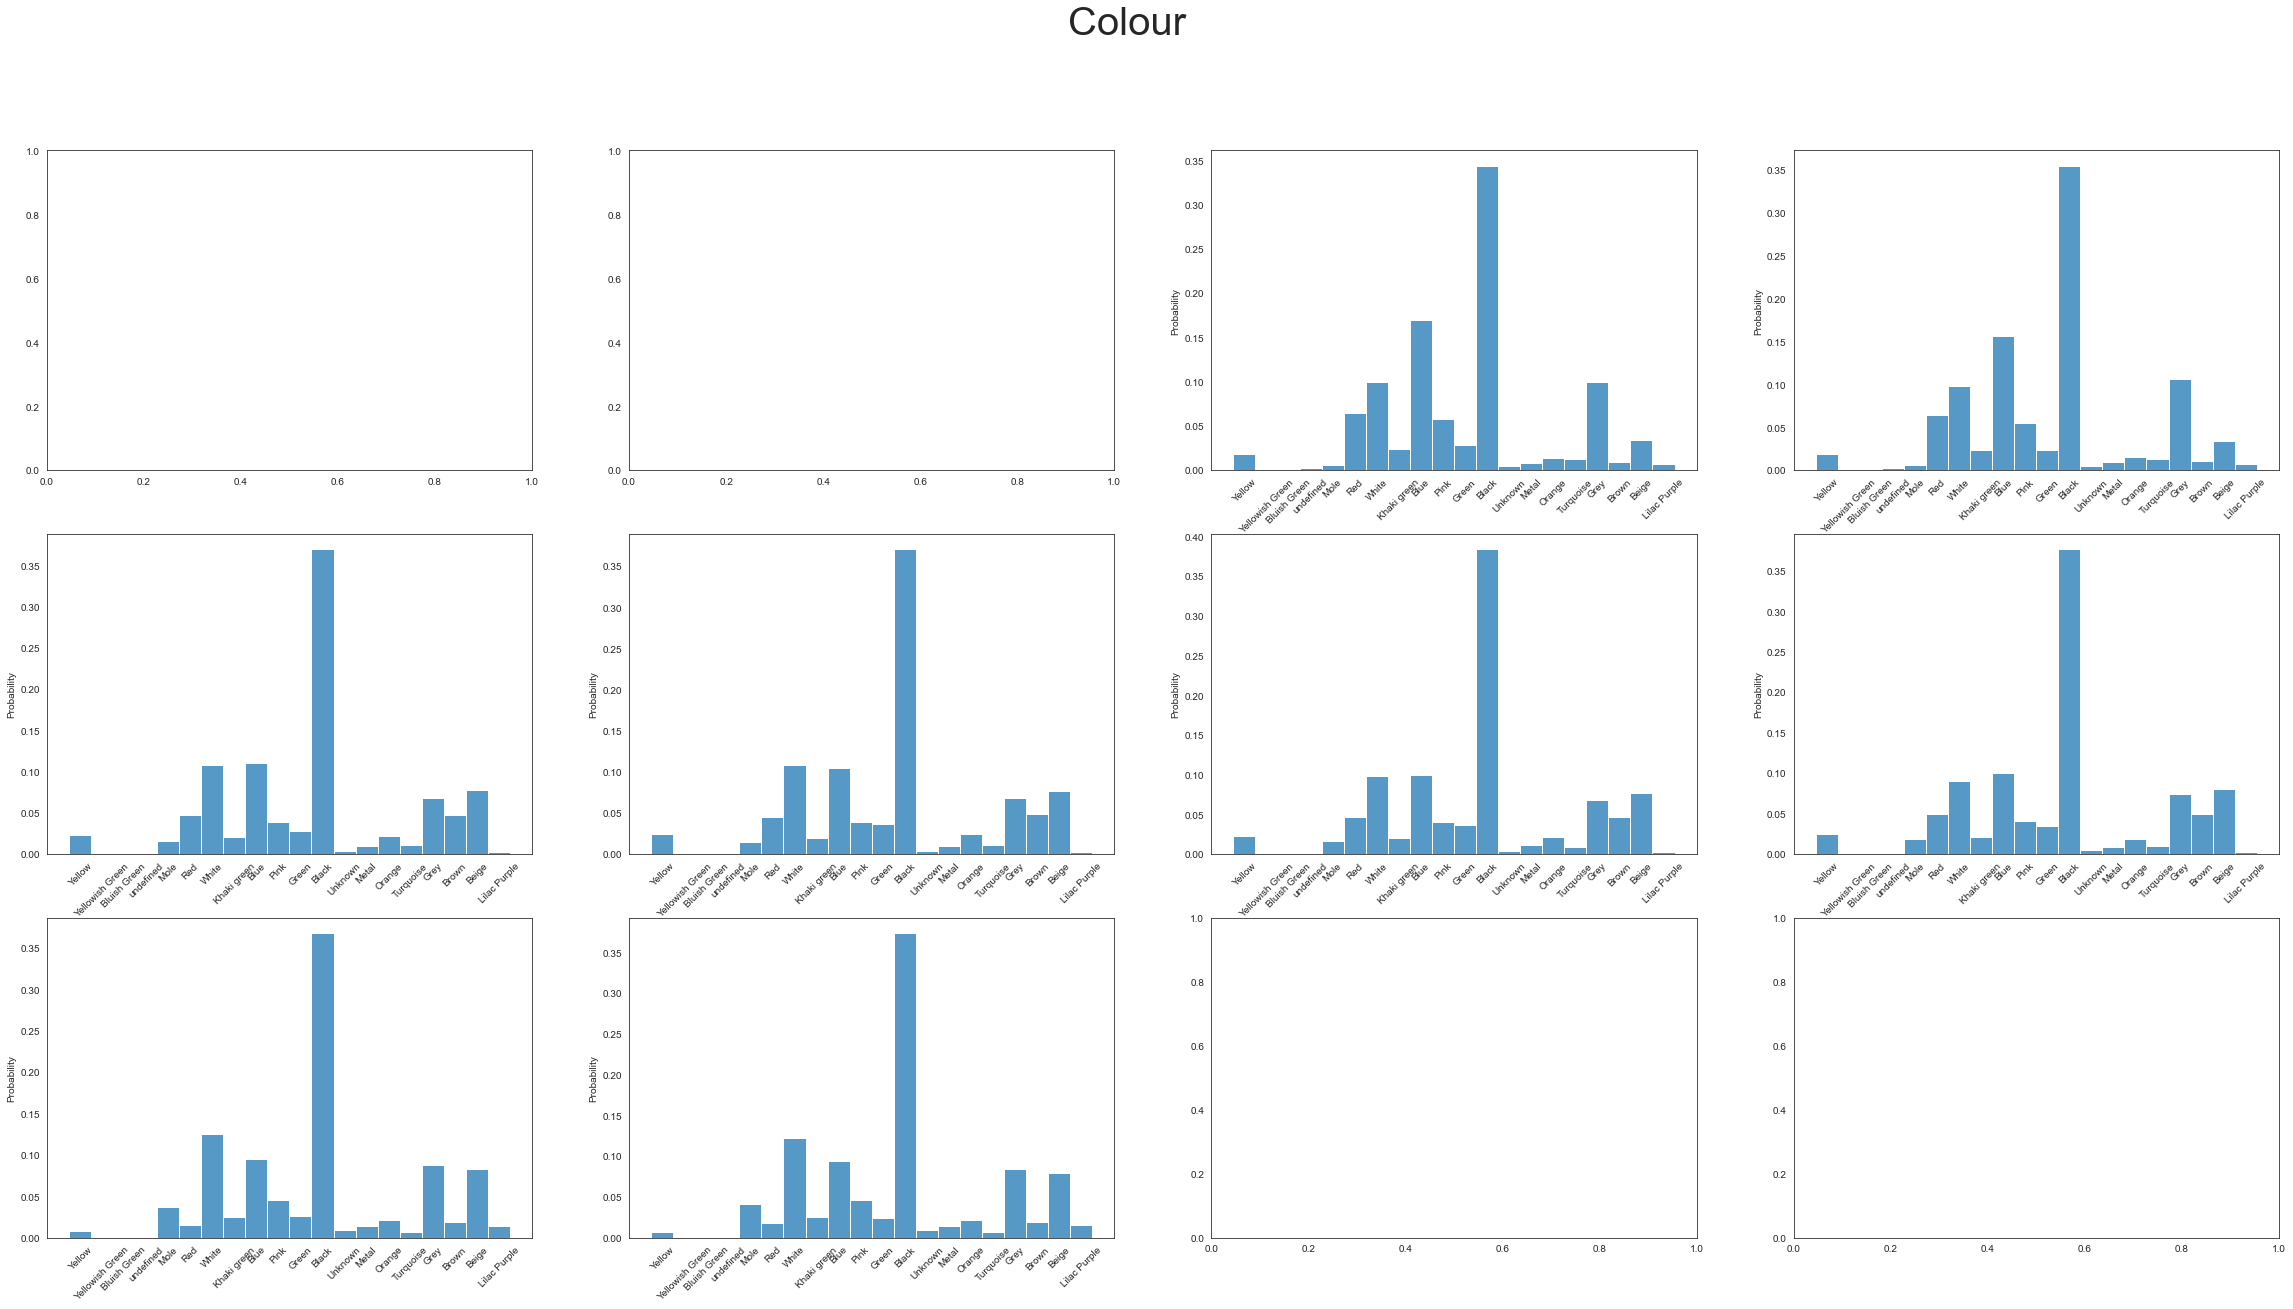

In [116]:
print(set(df_info['perceived_colour_master_name']))
plot_trends_year('perceived_colour_master_name',"Colour")

{'Medium', 'Unknown', 'Dusty Light', 'Undefined', 'Medium Dusty', 'Dark', 'Light', 'Bright'}


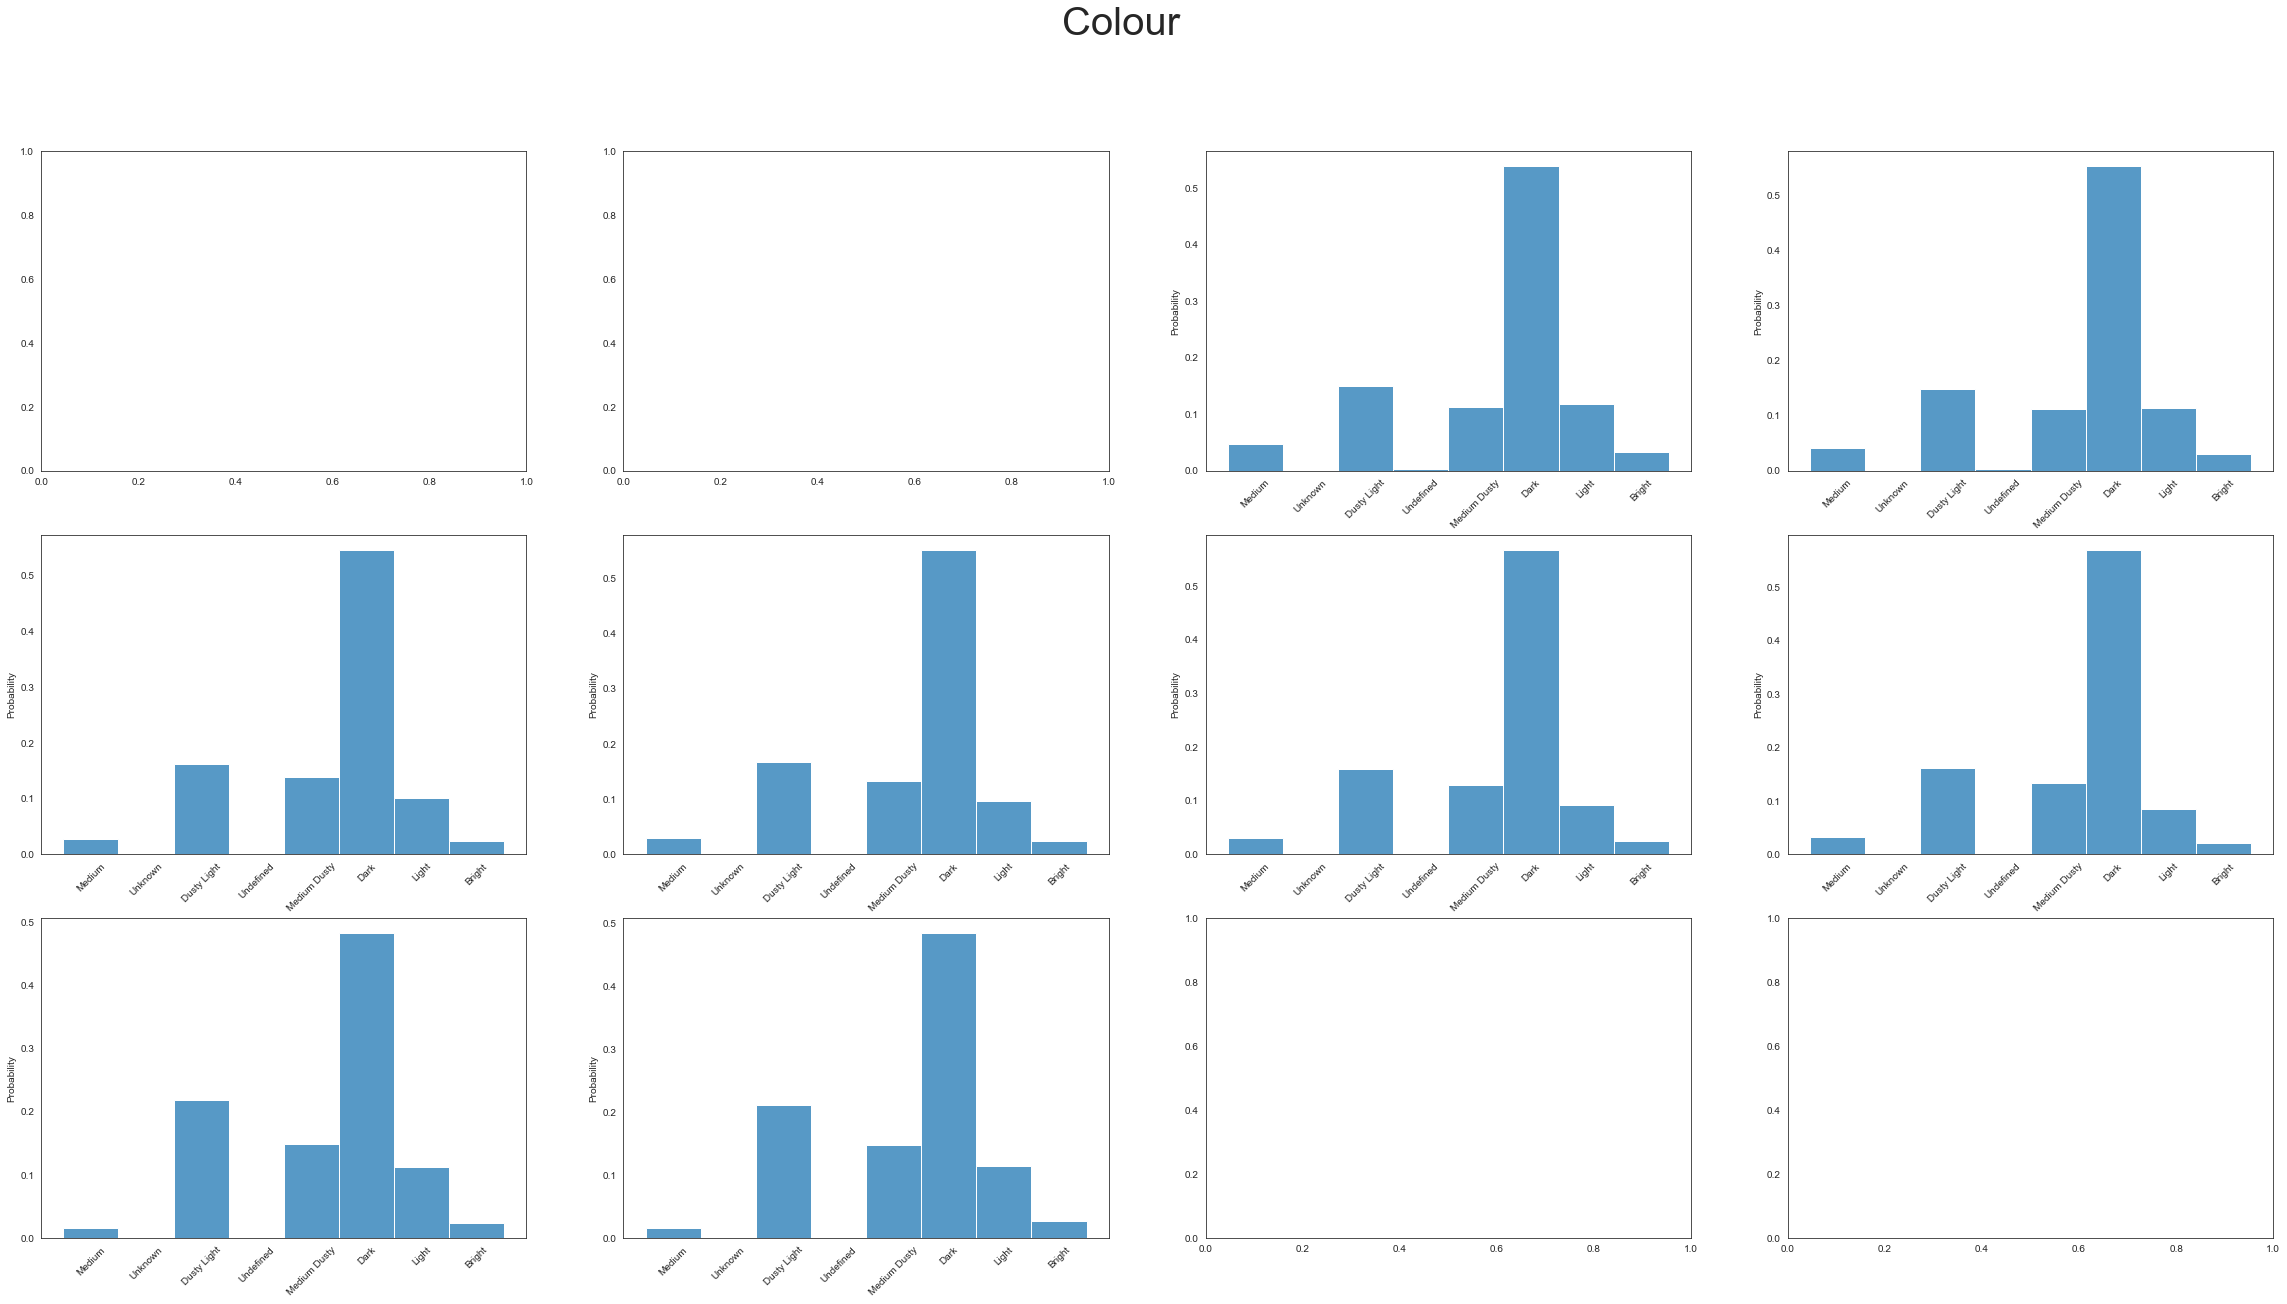

In [114]:
print(set(df_info['perceived_colour_value_name']))
plot_trends_year('perceived_colour_value_name',"Colour")

{'Underwear', 'Socks & Tights', 'Interior textile', 'Shoes', 'Underwear/nightwear', 'Fun', 'Bags', 'Garment and Shoe care', 'Garment Upper body', 'Garment Full body', 'Accessories', 'Nightwear', 'Unknown', 'Cosmetic', 'Stationery', 'Furniture', 'Items', 'Garment Lower body', 'Swimwear'}


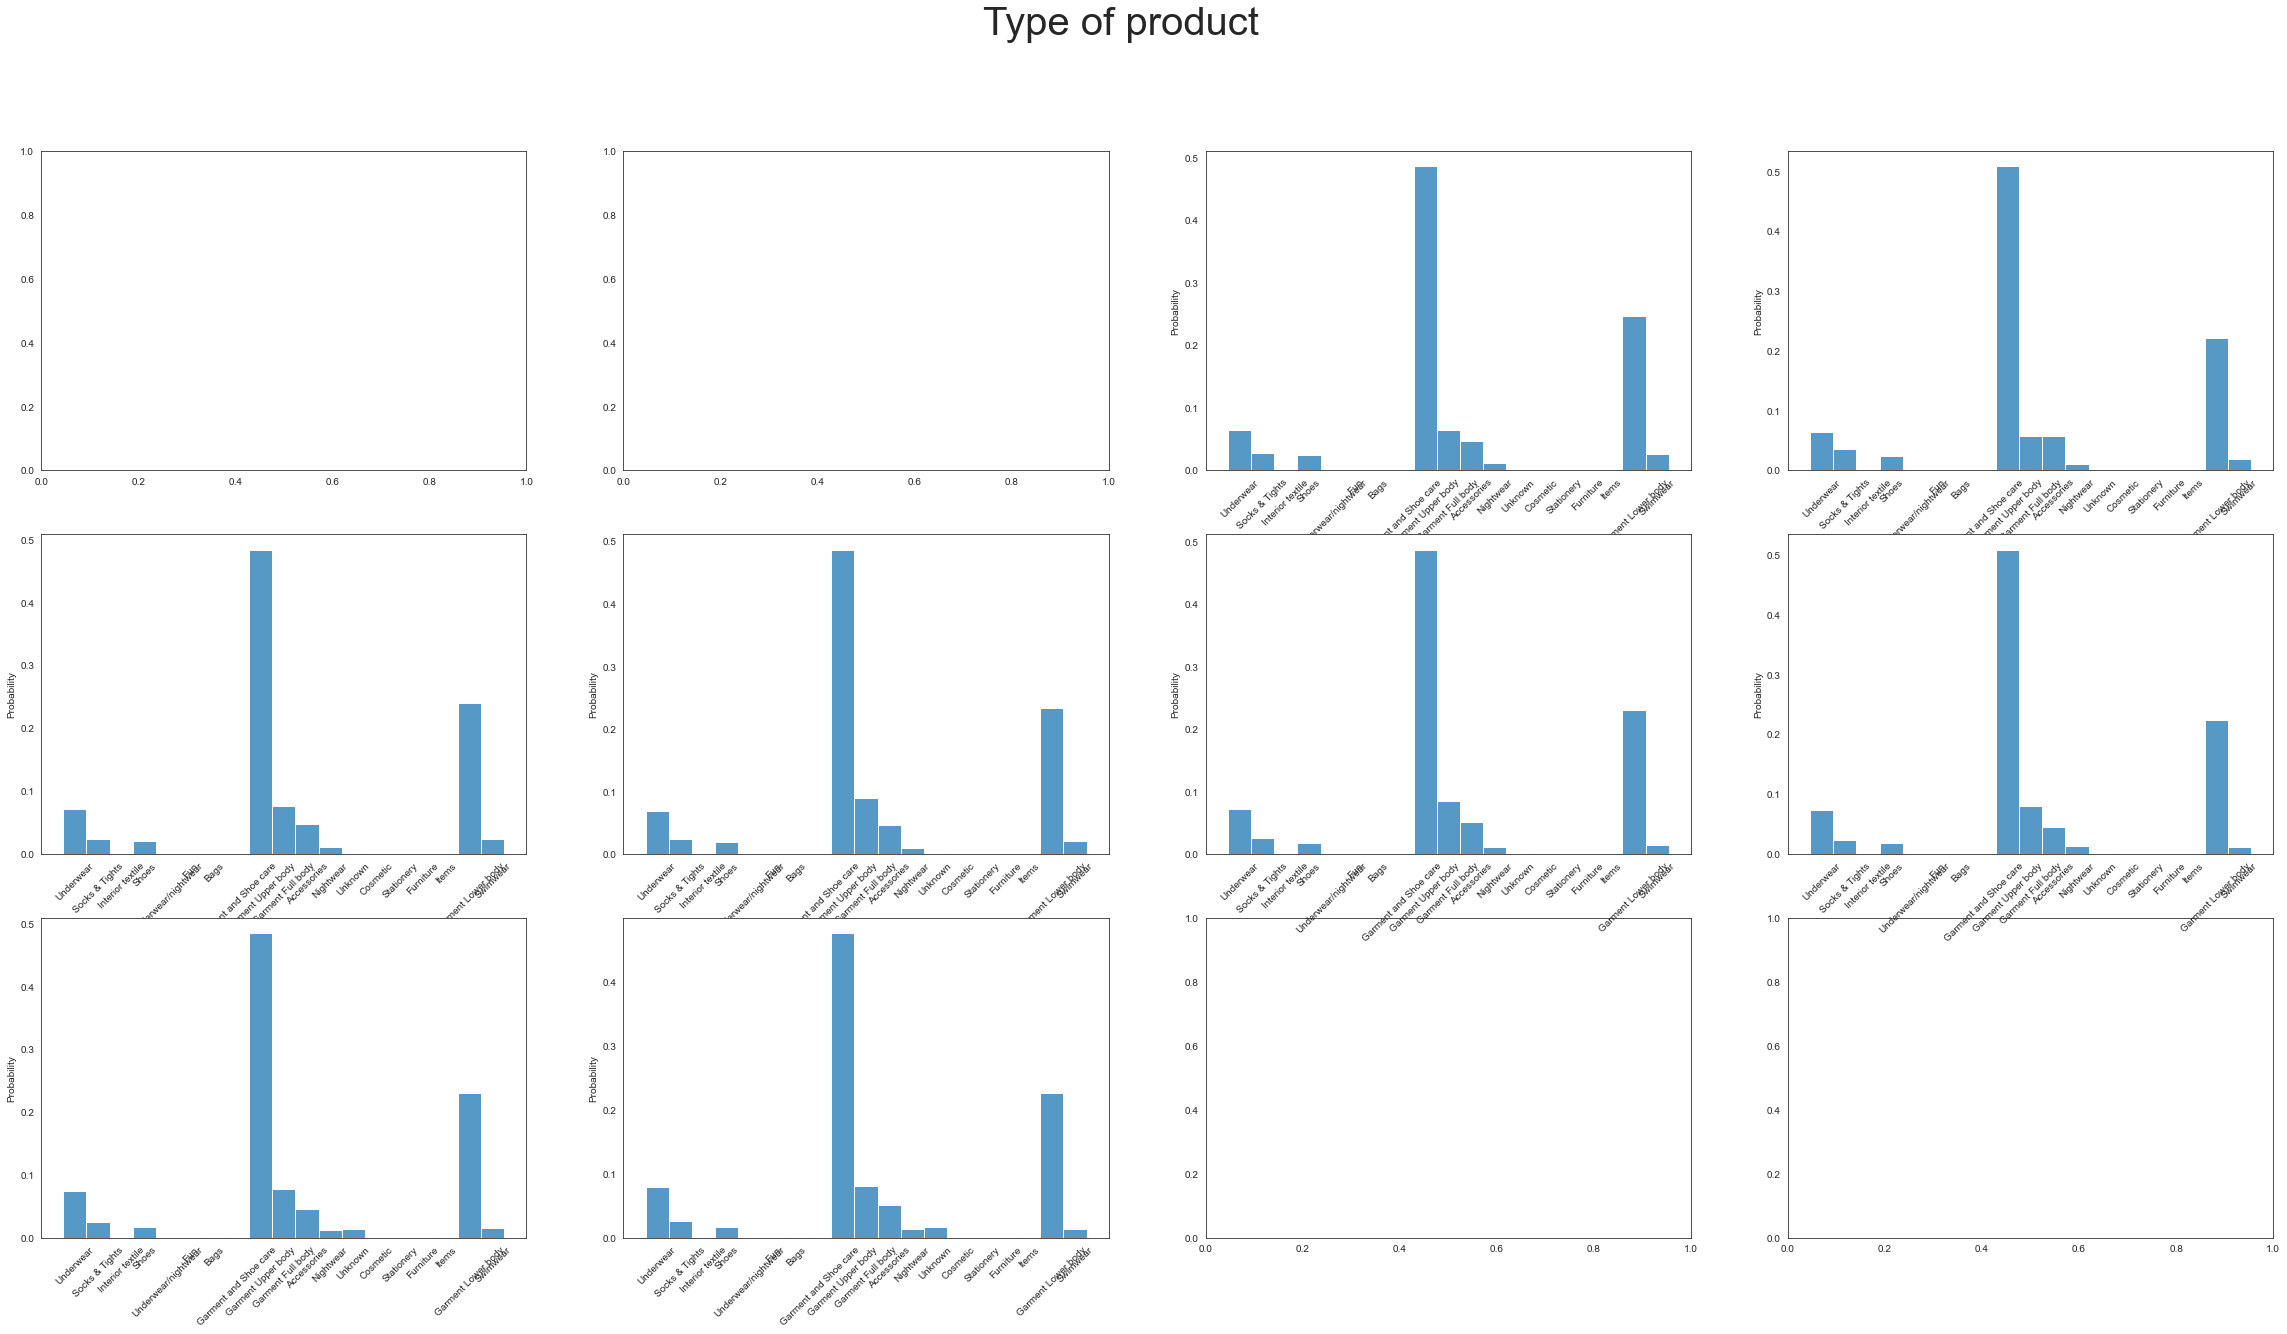

In [115]:
print(set(df_info['product_group_name']))
plot_trends_year('product_group_name',"Type of product")

## First approach

In [163]:
# we take 1 months of data
df_1 = df1[df1['t_conv']>703]x

,t_dat,customer_id,article_id,price,sales_channel_id,t_conv
30632391,2020-08-23,001cb0cd244c58fa35f9eb21f995b9e2f3e0c67c4e89af...,0464297031,0.016932,1,704.0
30632392,2020-08-23,003a8444fce07c006258eb969943a4f1ff14c696af8c1f...,0797988001,0.025407,2,704.0
30632393,2020-08-23,003a8444fce07c006258eb969943a4f1ff14c696af8c1f...,0832307003,0.038119,2,704.0
30632394,2020-08-23,003e750f71b6b1a81b561d50b7c76620c8c1f6b6a91981...,0761696004,0.042356,2,704.0
30632395,2020-08-23,0050be3089108d675eaa2e173b9a045a33ee7c25acfafc...,0743633001,0.050831,1,704.0
...,...,...,...,...,...,...
31788308,2020-09-22,ffcd5ff3fd5b9ee6b984c143c973fd2697ca141483d381...,0918522001,0.042356,2,734.0
31788309,2020-09-22,ffcd5ff3fd5b9ee6b984c143c973fd2697ca141483d381...,0918485001,0.067780,2,734.0
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,0918325001,0.043203,1,734.0
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,0833459002,0.006763,1,734.0


In [170]:
# repartition of most bought items in the previous 30 days
art_rep = df_1.groupby('article_id')['customer_id'].nunique()
art_rep =art_rep/art_rep.sum()
art_rep

article_id
0108775044    0.000011
0110065011    0.000002
0111565001    0.000093
0111586001    0.000236
0111593001    0.000239
                ...   
0952267001    0.000031
0952938001    0.000005
0953450001    0.000017
0953763001    0.000023
0956217002    0.000012
Name: customer_id, Length: 28522, dtype: float64

In [171]:
choice = random.choices(art_rep.index,weights=art_rep,k=12)
choice_str = ' '.join(map(str,choice))
choice_str

'0573085043 0830581003 0739364001 0877961023 0640664010 0814116005 0810169002 0872537001 0902518003 0768847001 0909370001 0871311003'

In [174]:
sub_format['prediction'] = choice_str
sub_format.to_csv('submission.csv',index=False)